Стохастический градиентный спуск

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
class LinearRegressionGD:
    def __init__(self, lr=0.01, max_iter=1000, tol=1e-3, intercept = True):
        # скорость обучения градиентного спуска
        self.learning_rate = lr
        # максимальное число итераций
        self.max_iteration = max_iter
        # критерий сходимости
        self.tolerance_convergence  = tol
        # наличие свободного члена
        self.intercept = intercept
        # инициальзация весов: None
        self.theta = None
        self.n = None
        self.d = None

    def fit(self, X, y):
        self.X = X.copy()
        if self.intercept:
            self.X = np.hstack((np.ones((self.X.shape[0], 1)), self.X))
        # размерность вектора X
        self.n, self.d = self.X.shape
        # инициализация случайных весов
        self.theta = np.random.randn(self.d)
        steps, errors = [], []
        step = 0
        for _ in range(self.max_iteration):
            grad = self.gradient(self.X, y)
            self.theta -= self.learning_rate * grad
            new_error = ((y - self.predict(X)).T @ (y - self.predict(X))) / self.n
            step += 1
            steps.append(step)
            errors.append(new_error)
            # проверка сходимости
            if np.linalg.norm(grad) < self.tolerance_convergence:
                break
        return steps, errors

    def gradient(self, X, y):
        return X.T @ (X @ self.theta - y) / len(y)

    def predict(self, X):
        if self.intercept:
            X_ = np.hstack((np.ones((X.shape[0],1)), X))
        else:
            X_ = X
        return X_ @ self.theta

    def MSE(self, X, y):
        return ((y - self.predict(X)).T @ (y - self.predict(X))) / len(y)

    def MAE(self, X, y):
        return abs(y - self.predict(X)).mean()

    def MAPE(self, X, y):
        return abs((y - self.predict(X))/y).mean()

Время обучения: 0.016902923583984375
MSE:  3.9513531959013815
Коэффициенты:  [6.12532526 0.82239767 1.95401073 3.2499944  4.4309121  4.73816237]


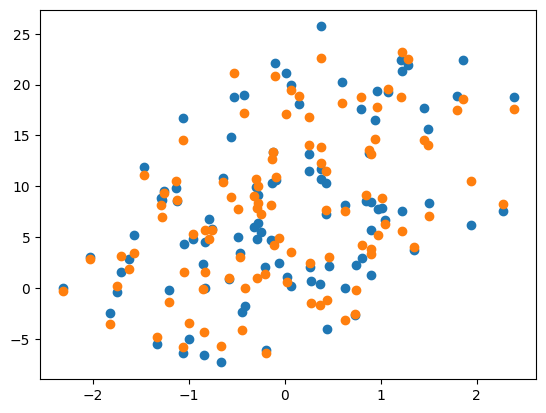

In [ ]:
X = np.random.randn(100, 5)
y = X @ np.array([1, 2, 3, 4, 5]) + np.random.randn(100) * 2 + 6

start_time = time.time()
modelGD = LinearRegressionGD(lr=0.01, max_iter=400, tol=1e-3, intercept = True)
steps, errors = modelGD.fit(X, y)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
y_pred = modelGD.predict(X)
print("MSE: ", modelGD.MSE(X, y))
print("Коэффициенты: ", modelGD.theta)
plt.scatter(X[:,2], y)
plt.scatter(X[:,2], y_pred)

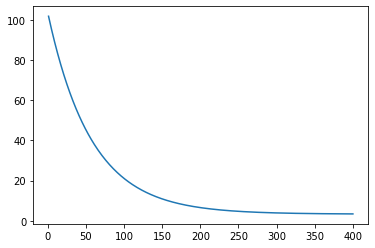

In [ ]:
fig = plt.plot(steps, errors)

In [ ]:
class LinearRegressionSGD:
    def __init__(self, lr=0.01, max_iter=1000, batch_size=32, tol=1e-3, intercept = True):
        # скорость обучения градиентного спуска
        self.learning_rate = lr
        # максимальное число итераций
        self.max_iteration = max_iter
        # размер мини-батча
        self.batch_size = batch_size
        # критерий сходимости
        self.tolerance_convergence  = tol
        # наличие свободного члена
        self.intercept = intercept
        # инициальзация весов: None
        self.theta = None
        self.n = None
        self.d = None

    def fit(self, X, y):
        self.X = X.copy()
        self.y = y.copy()
        if self.intercept:
            self.X = np.hstack((np.ones((self.X.shape[0], 1)), self.X))
        # размерность вектора X
        self.n, self.d = self.X.shape
        # инициализация случайных весов
        self.theta = np.random.randn(self.d)
        steps, errors = [], []
        step = 0
        for _ in range(self.max_iteration):
            # перемешивание данных
            indices = np.random.permutation(self.n)
            X = self.X[indices]
            y = self.y[indices]
            # цикл по мини-батчам
            for i in range(0, self.n, self.batch_size):
                X_batch = X[i:i+self.batch_size]
                y_batch = y[i:i+self.batch_size]
                grad = self.gradient(X_batch, y_batch)
                self.theta -= self.learning_rate * grad
            new_error = ((self.y - self.X @ self.theta).T @ (self.y - self.X @ self.theta)) / self.n
            step += 1
            steps.append(step)
            errors.append(new_error)
            # проверка сходимости
            if np.linalg.norm(grad) < self.tolerance_convergence:
                break
        return steps, errors

    def gradient(self, X, y):
        return X.T @ (X @ self.theta - y) / len(y)

    def predict(self, X):
        if self.intercept:
            X_ = np.hstack((np.ones((X.shape[0],1)), X))
        else:
            X_ = X
        return X_ @ self.theta

    def MSE(self, X, y):
        return ((y - self.predict(X)).T @ (y - self.predict(X))) / len(y)

    def MAE(self, X, y):
        return abs(y - self.predict(X)).mean()

    def MAPE(self, X, y):
        return abs((y - self.predict(X))/y).mean()

Время обучения: 0.008029460906982422
MSE:  3.2715155434607883
Коэффициенты:  [5.9581516  0.95429486 2.34572228 3.23767934 4.06904021 5.22419489]


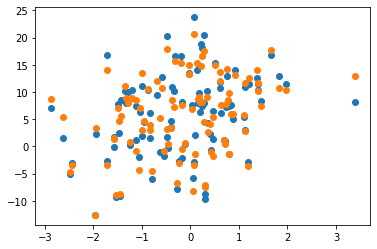

In [ ]:
start_time = time.time()
modelSGD = LinearRegressionSGD(lr=0.01, max_iter=50, batch_size=8, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(X, y)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
y_pred = modelSGD.predict(X)
print("MSE: ", np.mean((y_pred - y) ** 2))
print("Коэффициенты: ", modelSGD.theta)
plt.scatter(X[:,2], y)
plt.scatter(X[:,2], y_pred)

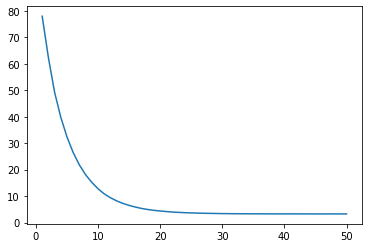

In [ ]:
fig = plt.plot(steps, errors)

In [ ]:
def train_test_split_(x, y, test_size=0.2, random_state=None):
    data = np.concatenate((x, y.reshape(y.shape[0],1)), axis=1)
    # Задаем seed для воспроизводимости результатов, если указан random_state
    if random_state is not None:
        np.random.seed(random_state)

    # Вычисляем количество элементов для тестовой выборки
    num_test = int(len(data) * test_size)

    # Случайно перемешиваем индексы
    shuffled_indices = np.random.permutation(len(data))

    # Выбираем индексы для тестовой выборки
    test_indices = shuffled_indices[:num_test]

    # Выбираем индексы для обучающей выборки
    train_indices = shuffled_indices[num_test:]

    # Разделяем данные на обучающую и тестовую выборки
    train_data = data[train_indices]
    test_data = data[test_indices]

    return train_data[:,:-1], train_data[:,-1], test_data[:,:-1], test_data[:,-1]

In [ ]:
from sklearn import datasets
import pandas as pd
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data)
df.columns = diabetes.feature_names

# Создание нового столбца, содержащего целевую переменную 'y'
# (количественный показатель прогрессирования заболевания
# через год после исходного уровня)
df['diabetes_measure'] = diabetes.target
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print(df.head())
x_train, y_train, x_test, y_test = train_test_split_(X, y, test_size = 0.3, random_state = 123)
x_train1 = np.hstack((np.ones((x_train.shape[0], 1)), x_train))
x_test1 = np.hstack((np.ones((x_test.shape[0], 1)), x_test))


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  diabetes_measure  
0 -0.002592  0.019908 -0.017646             151.0  
1 -0.039493 -0.068330 -0.092204              75.0  
2 -0.002592  0.002864 -0.025930             141.0  
3  0.034309  0.022692 -0.009362             206.0  
4 -0.002592 -0.031991 -0.046641             135.0  


Реализуем L2-регуляризацию с помощью прямых вычислений:
\begin{align}w &= (X^TX + \lambda I_d)^{-1}X^Ty\end{align}

In [ ]:
train_scores, test_scores = [], []
id = np.eye(x_train.shape[1]+1)
id[0][0] = 0
print("l, MSE_test - MSE_train:")
for l in np.logspace(-20, 20, 100):
    w = np.linalg.inv(x_train1.T @ x_train1 + l*id) @ x_train1.T @ y_train
    MSE_train = (y_train - x_train1 @ w).T @ (y_train - x_train1 @ w)/ x_train1.shape[0]
    train_scores.append(MSE_train)
    MSE_test = (y_test - x_test1 @ w).T @ (y_test - x_test1 @ w)/ x_test1.shape[0]
    test_scores.append(MSE_test)
    print(l, MSE_test - MSE_train)
plt.plot(train_scores, 'g')
plt.plot(test_scores, 'r')

start_time = time.time()
w = np.linalg.inv(x_train1.T @ x_train1 + 0.038*id) @ x_train1.T @ y_train
MSE_train = (y_train - x_train1 @ w).T @ (y_train - x_train1 @ w)/ x_train1.shape[0]
MSE_test = (y_test - x_test1 @ w).T @ (y_test - x_test1 @ w)/ x_test1.shape[0]
print("Время обучения:", time.time() - start_time)
print("MSE_train, MSE_test", MSE_train, MSE_test)
print("Коэффициенты: ", w)
print("np.linalg.det(x_train.T @ x_train): ", np.linalg.det(x_train1.T @ x_train1))
print("np.linalg.det(x_train.T @ x_train + 0.43287*id): ", np.linalg.det(x_train1.T @ x_train1 + 0.43287*id))

Время обучения: 0.22944164276123047
MSE_train:  3060.373485640746
MSE_test:  3187.08646560202
Коэффициенты:  [ 152.69077714   42.40003462  -97.23685054  374.87420067  217.48475471
   -7.98703838  -39.08044106 -191.96067315  161.10079227  284.13538688
  158.81094408]


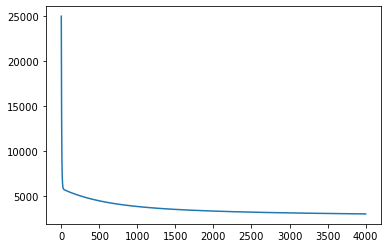

In [ ]:
start_time = time.time()
modelGD = LinearRegressionGD(lr=0.1, max_iter=4000, tol=1e-3, intercept = True)
steps, errors = modelGD.fit(x_train, y_train)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
print("MSE_train: ", modelGD.MSE(x_train, y_train))
print("MSE_test: ", modelGD.MSE(x_test, y_test))
print("Коэффициенты: ", modelGD.theta)
plt.plot(steps, errors)

Время обучения: 0.1321725845336914
MSE_train:  2874.4609628426965
MSE_test:  2959.60001488648
Коэффициенты:  [ 151.54919828   13.48021606 -242.17979114  533.74603458  266.90566414
  -74.58982618 -117.81123411 -206.82436788  169.24660125  390.33197463
  120.62395727]


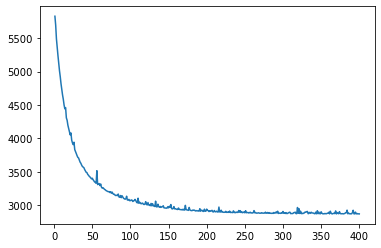

In [ ]:
start_time = time.time()
modelSGD = LinearRegressionSGD(lr=0.1, max_iter=400, batch_size=8, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(x_train, y_train)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
print("MSE_train: ", modelSGD.MSE(x_train, y_train))
print("MSE_test: ", modelSGD.MSE(x_test, y_test))
print("Коэффициенты: ", modelSGD.theta)
plt.plot(steps, errors)

Время обучения: 11.836442947387695
MSE_train:  2849.011855855992
MSE_test:  2952.8675760651913
Коэффициенты:  [ 154.02481144    9.47190624 -261.29242025  540.26642715  275.24723531
 -810.88978447  441.83478072  135.58266152  294.83303718  669.60045235
  101.81403851]


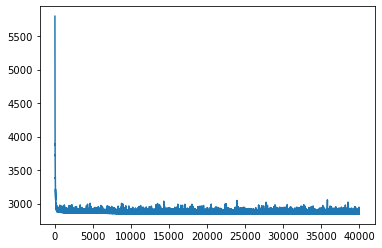

In [ ]:
start_time = time.time()
modelSGD = LinearRegressionSGD(lr=0.1, max_iter=40000, batch_size=8, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(x_train, y_train)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
print("MSE_train: ", modelSGD.MSE(x_train, y_train))
print("MSE_test: ", modelSGD.MSE(x_test, y_test))
print("Коэффициенты: ", modelSGD.theta)
plt.plot(steps, errors)

Время обучения: 4.202653408050537
MSE_train:  2852.267371300491
MSE_test:  2948.1222231535207
Коэффициенты:  [ 151.66732572   12.01094548 -259.01774853  545.44619426  272.59457248
 -501.54639352  193.24751893    3.30485912  262.40232093  553.34987629
  102.03661913]


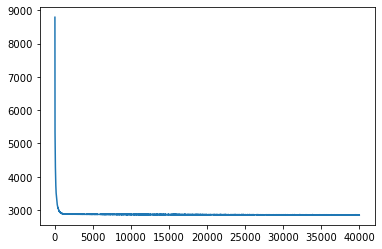

In [ ]:
start_time = time.time()
modelSGD = LinearRegressionSGD(lr=0.1, max_iter=40000, batch_size=32, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(x_train, y_train)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
print("MSE_train: ", modelSGD.MSE(x_train, y_train))
print("MSE_test: ", modelSGD.MSE(x_test, y_test))
print("Коэффициенты: ", modelSGD.theta)
plt.plot(steps, errors)

Видим, что у стохастического градиентного спуска качество выше, разрыв в качестве на обучающей и тестовой выборке меньше, время выполнения меньше, и чем у обычного градиентного спуска, и чем у прямых вычислений с L2-регуляризацией! При этом стохастический градиентный спуск работает более "шумно". Многое зависит и от оптимального подбора размера мини-батча.



<b>Домашнее задание</b>

# Задание 1

Объясните, почему коэффициенты всех построенных моделей сильно отличаются между собой.

При использовании градиентного спуска вычисляется градиент по всем обучающим значениям. При использовании стохастического градиентного спуска вычисляется градиент по подмножеству, количество элементов которых равняется batch_size, который усредняется для каждого батча. Поэтому результаты выглядят "нестабильными". Вследствии различия подходов выявляется сильно различие между коэффициентами моделей

# Задание 2

Сравните скорость и качество обучения моделей регрессии с помощью обычного и стохастического градиентного спуска на наборе данных housing.csv.

In [ ]:
import pandas as pd
df = pd.read_csv('./housing.csv')
df.head()

FileNotFoundError: ignored

In [ ]:
df.to_numpy().astype("float64")

data = df.copy()
Y = np.array(data['Y'])
x = np.array(data.drop('Y', axis=1))
x_train, y_train, x_test, y_test = train_test_split_(x, Y, 0.2, 20038)

In [ ]:
start_time = time.time()
modelGD = LinearRegressionGD(lr=0.1, max_iter=40000, tol=1e-3, intercept = True)
steps, errors = modelGD.fit(x_train, y_train)
print("Время обучения LinearRegressionGD:", time.time() - start_time)
print("MSE_train: ", modelGD.MSE(x_train, y_train))
print("MSE_test: ", modelGD.MSE(x_test, y_test))

start_time = time.time()
modelSGD1 = LinearRegressionSGD(lr=0.1, max_iter=40000, batch_size=10, tol=1e-3, intercept = True)
steps, errors = modelSGD1.fit(x_train, y_train)
print("Время обучения LinearRegressionSGD1, batch_size = 10:", time.time() - start_time)
print("MSE_train: ", modelSGD1.MSE(x_train, y_train))
print("MSE_test: ", modelSGD1.MSE(x_test, y_test))

start_time = time.time()
modelSGD3 = LinearRegressionSGD(lr=0.1, max_iter=40000, batch_size=100, tol=1e-3, intercept = True)
steps, errors = modelSGD3.fit(x_train, y_train)
print("Время обучения LinearRegressionSGD3, batch_size = 100:", time.time() - start_time)
print("MSE_train: ", modelSGD3.MSE(x_train, y_train))
print("MSE_test: ", modelSGD3.MSE(x_test, y_test))

Время обучения LinearRegressionSGD: 34.983476845453
MSE_train:  11.476214844434484
MSE_test:  8.155591844975152
Время обучения LinearRegressionSGD1, batch_size = 10: 12.924571233434
MSE_train:  6.903231314051814
MSE_test:  10.666767940272864
Время обучения LinearRegressionSGD3, batch_size = 100: 8.38547524234
MSE_train:  8.88258989448458
MSE_test:  7.3781098551481135


# Задание 3

Подберите в цикле оптимальное, с Вашей точки зрения, значение размера мини-батча и поясните Ваш выбор.

In [ ]:
from tqdm import tqdm
errors_array_train, errors_array_test, batch_size_arr = [], [], []
batch_time = []
for batch_size in tqdm(range(1, len(x_train), 20)):
   modelSGD = LinearRegressionSGD(lr=0.1, max_iter=40000, batch_size=batch_size, tol=1e-3, intercept = True)
   start_time = time.time()
   steps, errors = modelSGD.fit(x_train, y_train)
   batch_time.append(time.time() - start_time)
   errors_array_train.append(modelSGD.MSE(x_train, y_train))
   errors_array_test.append(modelSGD.MSE(x_test, y_test))
   batch_size_arr.append(batch_size)

100%|██████████| 21/21 [02:32<00:00,  7.27s/it]


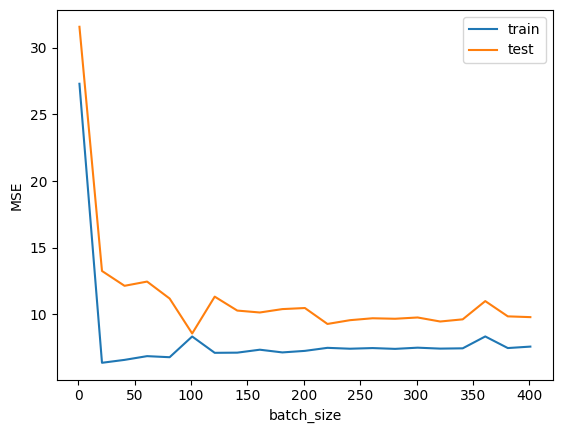

In [ ]:
plt.plot(batch_size_arr, errors_array_train, label='train')
plt.plot(batch_size_arr, errors_array_test, label='test')
plt.xlabel("batch_size")
plt.ylabel("MSE")
plt.legend()
plt.show()

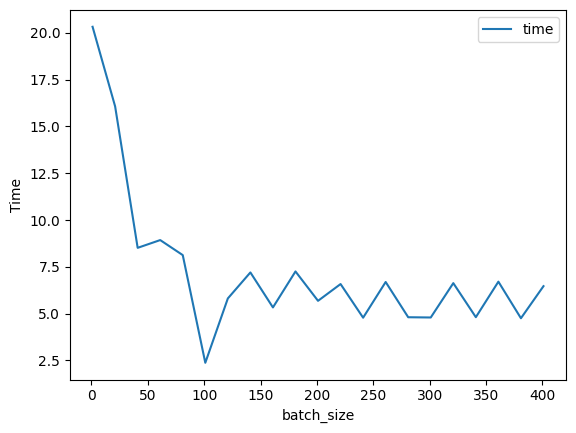

In [ ]:
plt.plot(batch_size_arr, batch_time, label='time')
plt.xlabel("batch_size")
plt.ylabel("Time")
plt.legend()
plt.show()

# Задание 4

Реализуйте в классе LinearRegressionSGD стохастический градиентный спуск с регуляризацией L1, L2, ElasticNet и подберите оптимальные параметры регуляризации, чтобы сократить разрыв качества на обучающей и тестовой выборке.

In [ ]:
class LinearRegressionSGD:
    def __init__(self, lr=0.01, max_iter=1000, batch_size=32, tol=1e-3, intercept = True):
        self.learning_rate = lr
        self.max_iteration = max_iter
        self.batch_size = batch_size
        self.tolerance_convergence  = tol
        self.intercept = intercept
        self.theta = None
        self.n = None
        self.d = None

    def fit(self, X, y, reg = "L1", lam = 0, rho = 0):
        self.X = X.copy()
        self.y = y.copy()
        if self.intercept:
            self.X = np.hstack((np.ones((self.X.shape[0], 1)), self.X))
        # размерность вектора X
        self.n, self.d = self.X.shape
        # инициализация случайных весов
        self.theta = np.random.randn(self.d)
        steps, errors = [], []
        step = 0
        for _ in range(self.max_iteration):
            # перемешивание данных
            indices = np.random.permutation(self.n)
            X = self.X[indices]
            y = self.y[indices]
            # цикл по мини-батчам
            for i in range(0, self.n, self.batch_size):
                X_batch = X[i:i+self.batch_size]
                y_batch = y[i:i+self.batch_size]
                grad = self.gradient(X_batch, y_batch)

                grad, self.theta = np.expand_dims(grad, axis=1), np.expand_dims(self.theta, axis=1)
                if reg == "L1":
                    grad += lam*(np.sign(self.theta))
                elif reg == "L2":
                    grad += 2*lam*((self.theta))
                elif reg == "ElasticNet":
                    grad += rho*lam*(np.sign(self.theta)) + 2*(1-rho)*lam*((self.theta))

                grad, self.theta = grad.flatten(), self.theta.flatten()

                self.theta -= self.learning_rate * grad
            new_error = ((self.y - self.X @ self.theta).T @ (self.y - self.X @ self.theta)) / self.n
            step += 1
            steps.append(step)
            errors.append(new_error)
            # проверка сходимости
            if np.linalg.norm(grad) < self.tolerance_convergence:
                break
        return steps, errors

    def gradient(self, X, y):
        return X.T @ (X @ self.theta - y) / len(y)

    def predict(self, X):
        if self.intercept:
            X_ = np.hstack((np.ones((X.shape[0],1)), X))
        else:
            X_ = X
        return X_ @ self.theta

    def MSE(self, X, y):
        return ((y - self.predict(X)).T @ (y - self.predict(X))) / len(y)

    def MAE(self, X, y):
        return abs(y - self.predict(X)).mean()

    def MAPE(self, X, y):
        return abs((y - self.predict(X))/y).mean()

# L1-регуляризация

100%|██████████| 7/7 [01:26<00:00, 12.29s/it]


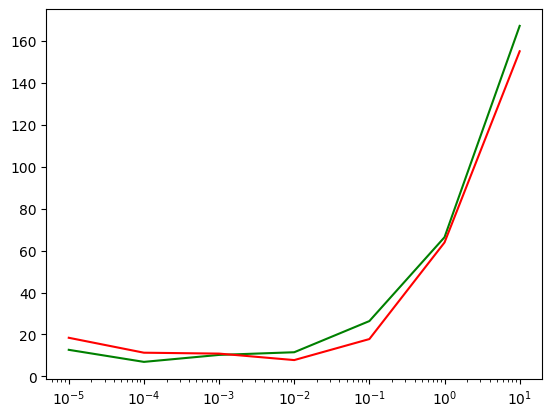

In [ ]:
# L1
from tqdm import tqdm
train_scores, test_scores = [], []
trainMAE, testMAE, trainMAPE, testMAPE = [], [], [], []
x_spatial = np.logspace(-5, 1, 7)
for l in tqdm(x_spatial):
    modelSGD = LinearRegressionSGD(lr=0.1, max_iter=40000, batch_size=100, tol=1e-3, intercept = True)
    steps, errors = modelSGD.fit(x_train, y_train, reg = "L1", lam = l)

    train_scores.append(modelSGD.MSE(x_train, y_train))
    test_scores.append(modelSGD.MSE(x_test, y_test))

    trainMAE.append(modelSGD.MAE(x_train, y_train))
    testMAE.append(modelSGD.MAE(x_test, y_test))

    trainMAPE.append(modelSGD.MAPE(x_train, y_train))
    testMAPE.append(modelSGD.MAPE(x_test, y_test))


plt.xscale("log")
plt.plot(x_spatial, train_scores, 'g')
plt.plot(x_spatial, test_scores, 'r')

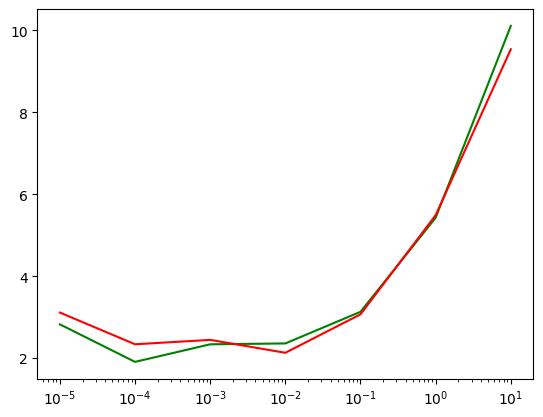

In [ ]:
plt.xscale("log")
plt.plot(x_spatial, trainMAE, 'g')
plt.plot(x_spatial, testMAE, 'r')

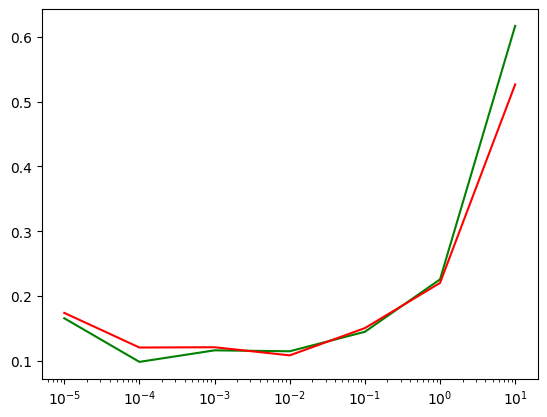

In [ ]:
plt.xscale("log")
plt.plot(x_spatial, trainMAPE, 'g')
plt.plot(x_spatial, testMAPE, 'r')

## L1 Подбор параметров

### L1-1

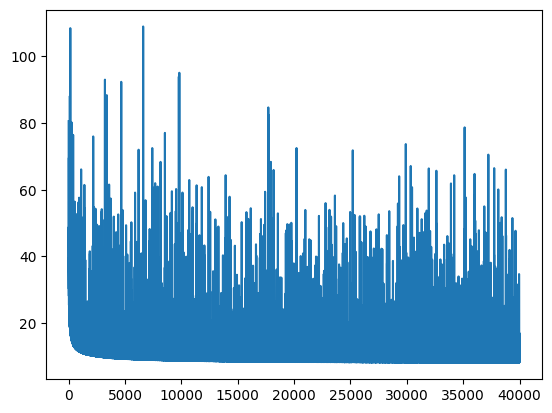

In [ ]:
modelSGD = LinearRegressionSGD(lr=0.1, max_iter=40000, batch_size=100, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(x_train, y_train, reg = "L1", lam = 2*1e-3)
plt.plot(steps, errors)

In [ ]:
print('MSE')
print(modelSGD.MSE(x_train, y_train))
print(modelSGD.MSE(x_test, y_test))
print('MAE')
print(modelSGD.MAE(x_train, y_train))
print(modelSGD.MAE(x_test, y_test))
print('MAPE')
print(modelSGD.MAPE(x_train, y_train))
print(modelSGD.MAPE(x_test, y_test))

MSE
10.2310008176017
11.143034418232471
MAE
2.3977351357918404
2.3569073283666113
MAPE
0.13537561391992342
0.1330027187663785


### L1-2

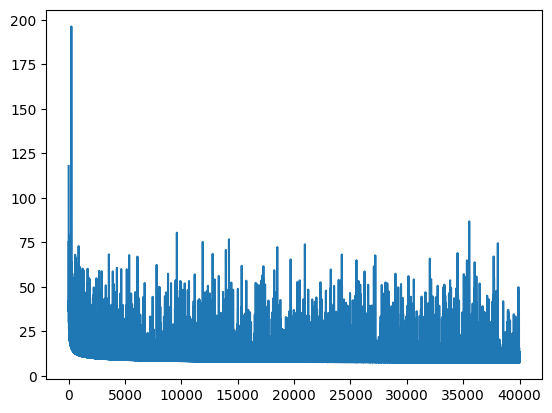

In [ ]:
modelSGD = LinearRegressionSGD(lr=0.1, max_iter=40000, batch_size=100, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(x_train, y_train, reg = "L1", lam = 1e-3)
plt.plot(steps, errors)

In [ ]:
print('MSE')
print(modelSGD.MSE(x_train, y_train))
print(modelSGD.MSE(x_test, y_test))
print('MAE')
print(modelSGD.MAE(x_train, y_train))
print(modelSGD.MAE(x_test, y_test))
print('MAPE')
print(modelSGD.MAPE(x_train, y_train))
print(modelSGD.MAPE(x_test, y_test))

MSE
11.496027669807567
9.293855748103255
MAE
2.472661747279888
2.345790708055842
MAPE
0.12040671345762977
0.11511186858088879


### L1-3

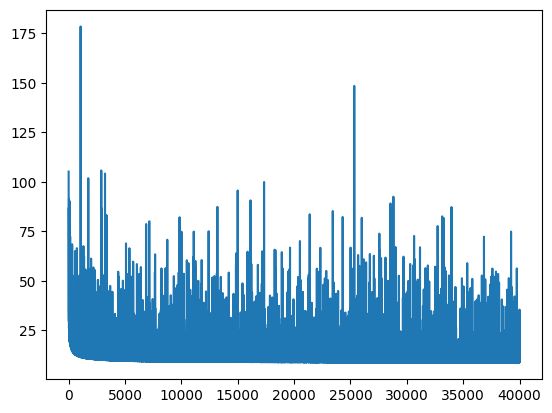

In [ ]:
modelSGD = LinearRegressionSGD(lr=0.1, max_iter=40000, batch_size=100, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(x_train, y_train, reg = "L1", lam = 3 * 1e-3)
plt.plot(steps, errors)

In [ ]:
print('MSE')
print(modelSGD.MSE(x_train, y_train))
print(modelSGD.MSE(x_test, y_test))
print('MAE')
print(modelSGD.MAE(x_train, y_train))
print(modelSGD.MAE(x_test, y_test))
print('MAPE')
print(modelSGD.MAPE(x_train, y_train))
print(modelSGD.MAPE(x_test, y_test))

MSE
11.496027669807567
9.293855748103255
MAE
2.472661747279888
2.345790708055842
MAPE
0.12040671345762977
0.11511186858088879


# L2-регуляризация

 86%|████████▌ | 6/7 [01:10<00:11, 11.86s/it]<ipython-input-9-174e73669088>:45: RuntimeWarning: overflow encountered in matmul
  new_error = ((self.y - self.X @ self.theta).T @ (self.y - self.X @ self.theta)) / self.n
<ipython-input-9-174e73669088>:55: RuntimeWarning: overflow encountered in matmul
  return X.T @ (X @ self.theta - y) / len(y)
<ipython-input-9-174e73669088>:55: RuntimeWarning: invalid value encountered in matmul
  return X.T @ (X @ self.theta - y) / len(y)
<ipython-input-9-174e73669088>:44: RuntimeWarning: invalid value encountered in subtract
  self.theta -= self.learning_rate * grad
100%|██████████| 7/7 [01:22<00:00, 11.78s/it]


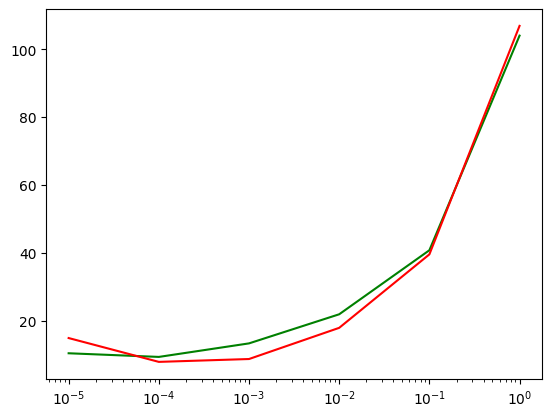

In [ ]:
train_scores, test_scores = [], []
trainMAE, testMAE, trainMAPE, testMAPE = [], [], [], []
x_spatial = np.logspace(-5, 1, 7)
for l in tqdm(x_spatial):
    modelSGD = LinearRegressionSGD(lr=0.1, max_iter=40000, batch_size=100, tol=1e-3, intercept = True)
    steps, errors = modelSGD.fit(x_train, y_train, reg = "L2", lam = l)

    train_scores.append(modelSGD.MSE(x_train, y_train))
    test_scores.append(modelSGD.MSE(x_test, y_test))

    trainMAE.append(modelSGD.MAE(x_train, y_train))
    testMAE.append(modelSGD.MAE(x_test, y_test))

    trainMAPE.append(modelSGD.MAPE(x_train, y_train))
    testMAPE.append(modelSGD.MAPE(x_test, y_test))

plt.xscale("log")
plt.plot(x_spatial, train_scores, 'g')
plt.plot(x_spatial, test_scores, 'r')

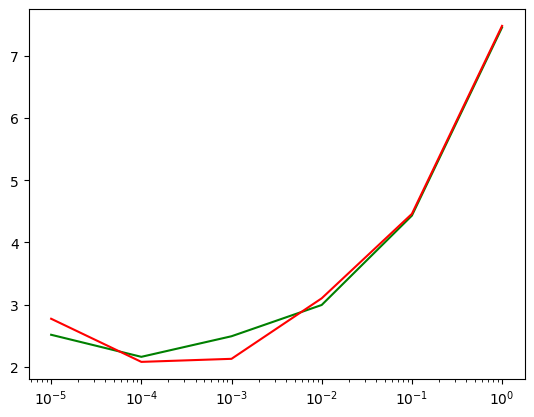

In [ ]:
plt.xscale("log")
plt.plot(x_spatial, trainMAE, 'g')
plt.plot(x_spatial, testMAE, 'r')

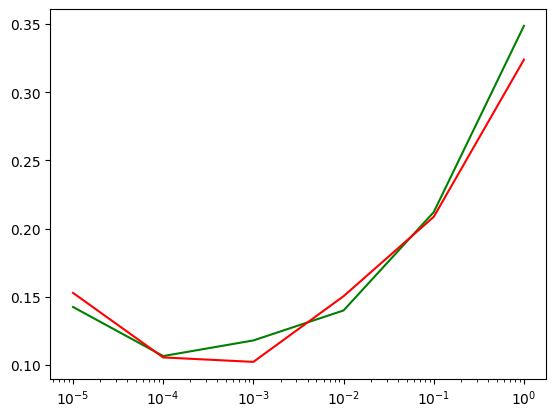

In [ ]:
plt.xscale("log")
plt.plot(x_spatial, trainMAPE, 'g')
plt.plot(x_spatial, testMAPE, 'r')

## L2 Подбор параметров

### L2-1


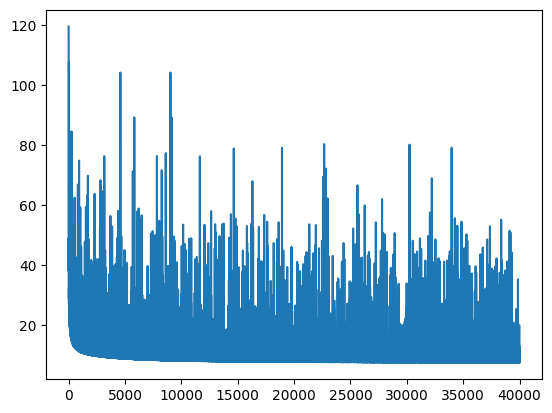

In [ ]:
modelSGD = LinearRegressionSGD(lr=0.1, max_iter=40000, batch_size=100, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(x_train, y_train, reg = "L2", lam = 5 * 1e-5)
plt.plot(steps, errors)

In [ ]:
print('MSE')
print(modelSGD.MSE(x_train, y_train))
print(modelSGD.MSE(x_test, y_test))
print('MAE')
print(modelSGD.MAE(x_train, y_train))
print(modelSGD.MAE(x_test, y_test))
print('MAPE')
print(modelSGD.MAPE(x_train, y_train))
print(modelSGD.MAPE(x_test, y_test))

MSE
8.002108951407907
9.315986352952812
MAE
2.0560958830923677
2.1718757075680664
MAPE
0.10742098418509315
0.11591468791245588


### L2-2

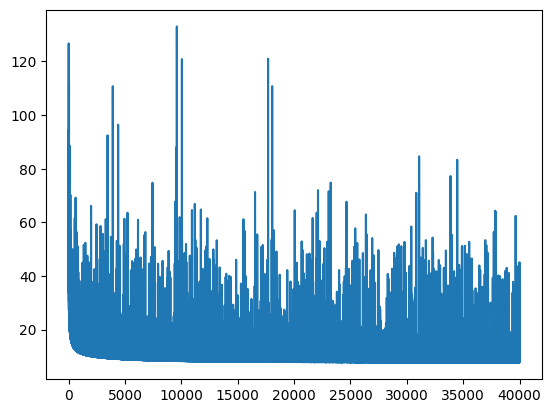

In [ ]:
modelSGD = LinearRegressionSGD(lr=0.1, max_iter=40000, batch_size=100, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(x_train, y_train, reg = "L2", lam = 6 * 1e-5)
plt.plot(steps, errors)

In [ ]:
print('MSE')
print(modelSGD.MSE(x_train, y_train))
print(modelSGD.MSE(x_test, y_test))
print('MAE')
print(modelSGD.MAE(x_train, y_train))
print(modelSGD.MAE(x_test, y_test))
print('MAPE')
print(modelSGD.MAPE(x_train, y_train))
print(modelSGD.MAPE(x_test, y_test))

MSE
7.999875205241684
8.163303841616028
MAE
2.0077771023003694
2.0944090569750378
MAPE
0.09999328991518436
0.10859122723581878


### L2-3

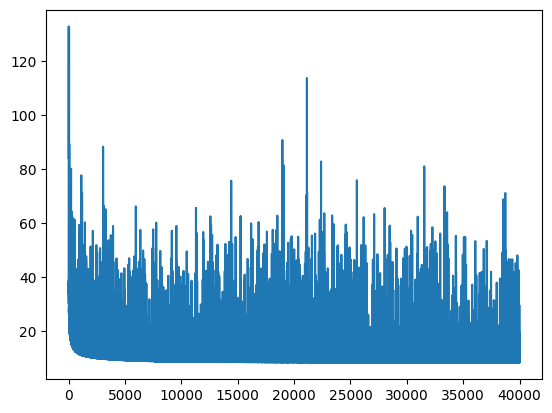

In [ ]:
modelSGD = LinearRegressionSGD(lr=0.1, max_iter=40000, batch_size=100, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(x_train, y_train, reg = "L2", lam = 1e-4)
plt.plot(steps, errors)

In [ ]:
print('MSE')
print(modelSGD.MSE(x_train, y_train))
print(modelSGD.MSE(x_test, y_test))
print('MAE')
print(modelSGD.MAE(x_train, y_train))
print(modelSGD.MAE(x_test, y_test))
print('MAPE')
print(modelSGD.MAPE(x_train, y_train))
print(modelSGD.MAPE(x_test, y_test))

MSE
16.674967673577786
18.15971659661995
MAE
3.2517519563067894
3.196739888908329
MAPE
0.19722702051932786
0.18893738940712726


# ElasticNet

100%|██████████| 6/6 [01:17<00:00, 12.89s/it]


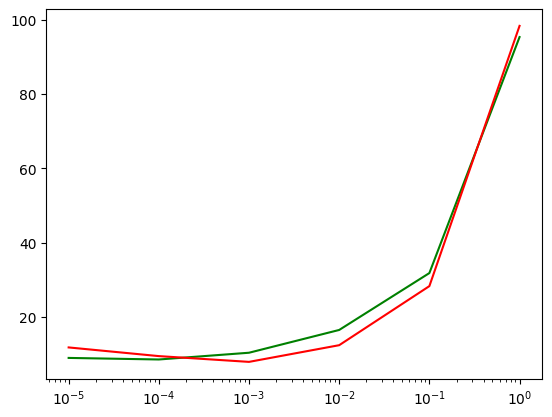

In [ ]:
train_scores, test_scores = [], []
trainMAE, testMAE, trainMAPE, testMAPE = [], [], [], []
x_spatial = np.logspace(-5, 0, 6)
for l in tqdm(x_spatial):
    modelSGD = LinearRegressionSGD(lr=0.1, max_iter=40000, batch_size=100, tol=1e-3, intercept = True)
    steps, errors = modelSGD.fit(x_train, y_train, reg = "ElasticNet", lam = l, rho = 0.7)

    train_scores.append(modelSGD.MSE(x_train, y_train))
    test_scores.append(modelSGD.MSE(x_test, y_test))

    trainMAE.append(modelSGD.MAE(x_train, y_train))
    testMAE.append(modelSGD.MAE(x_test, y_test))

    trainMAPE.append(modelSGD.MAPE(x_train, y_train))
    testMAPE.append(modelSGD.MAPE(x_test, y_test))

plt.xscale("log")
plt.plot(x_spatial, train_scores, 'g')
plt.plot(x_spatial, test_scores, 'r')

100%|██████████| 5/5 [00:55<00:00, 11.02s/it]


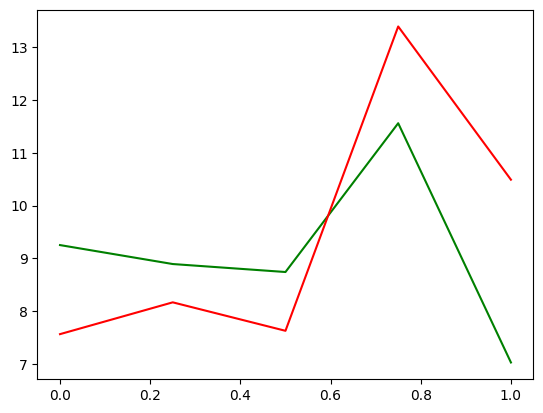

In [ ]:
train_scores, test_scores = [], []
trainMAE, testMAE, trainMAPE, testMAPE = [], [], [], []
x_spatial = np.linspace(0, 1, 5)
for l in tqdm(x_spatial):
    modelSGD = LinearRegressionSGD(lr=0.1, max_iter=40000, batch_size=128, tol=1e-3, intercept = True)
    steps, errors = modelSGD.fit(x_train, y_train, reg = "ElasticNet", lam = 2 * 1e-4, rho = l)

    train_scores.append(modelSGD.MSE(x_train, y_train))
    test_scores.append(modelSGD.MSE(x_test, y_test))

    trainMAE.append(modelSGD.MAE(x_train, y_train))
    testMAE.append(modelSGD.MAE(x_test, y_test))

    trainMAPE.append(modelSGD.MAPE(x_train, y_train))
    testMAPE.append(modelSGD.MAPE(x_test, y_test))

plt.plot(x_spatial, train_scores, 'g')
plt.plot(x_spatial, test_scores, 'r')

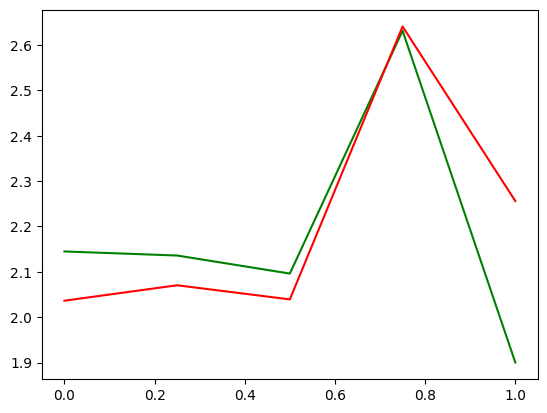

In [ ]:
plt.plot(x_spatial, trainMAE, 'g')
plt.plot(x_spatial, testMAE, 'r')

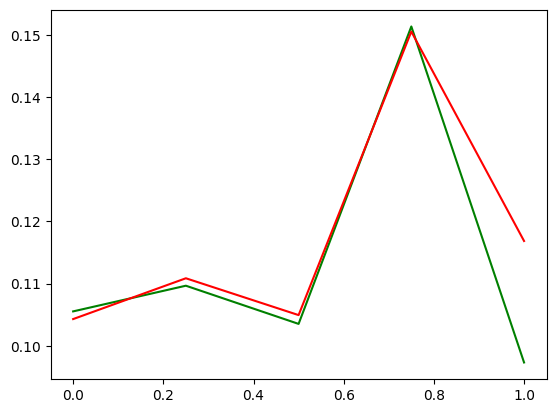

In [ ]:
plt.plot(x_spatial, trainMAPE, 'g')
plt.plot(x_spatial, testMAPE, 'r')

## ElasticNet Подбор параметров

### EN-1

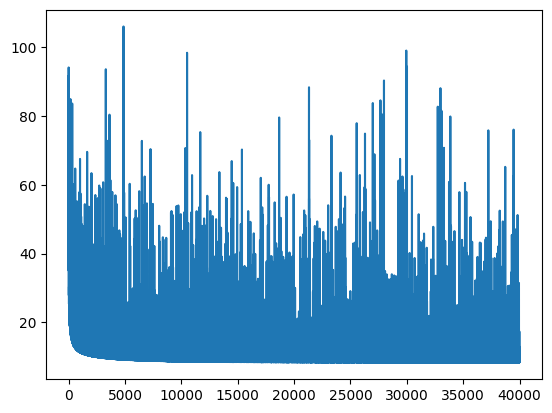

In [ ]:
modelSGD = LinearRegressionSGD(lr=0.1, max_iter=40000, batch_size=100, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(x_train, y_train, reg = "ElasticNet", lam = 2 * 1e-4, rho = 0.5)
plt.plot(steps, errors)

In [ ]:
print('MSE')
print(modelSGD.MSE(x_train, y_train))
print(modelSGD.MSE(x_test, y_test))
print('MAE')
print(modelSGD.MAE(x_train, y_train))
print(modelSGD.MAE(x_test, y_test))
print('MAPE')
print(modelSGD.MAPE(x_train, y_train))
print(modelSGD.MAPE(x_test, y_test))

MSE
12.5983588227968
9.82527617968278
MAE
2.582559459904682
2.421241833357651
MAPE
0.13083669582906302
0.12132040158645073


### EN-2

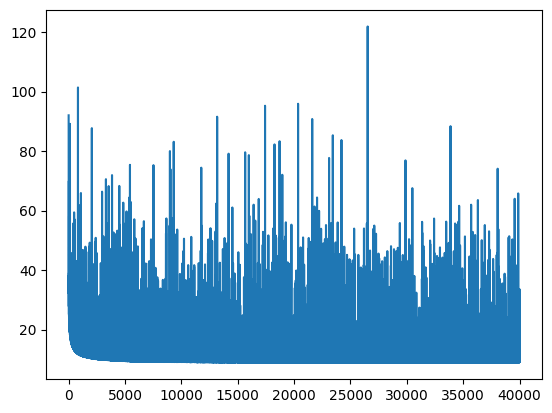

In [ ]:
modelSGD = LinearRegressionSGD(lr=0.1, max_iter=40000, batch_size=100, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(x_train, y_train, reg = "ElasticNet", lam = 2 * 1e-4, rho=0.1)
plt.plot(steps, errors)

In [ ]:
print('MSE')
print(modelSGD.MSE(x_train, y_train))
print(modelSGD.MSE(x_test, y_test))
print('MAE')
print(modelSGD.MAE(x_train, y_train))
print(modelSGD.MAE(x_test, y_test))
print('MAPE')
print(modelSGD.MAPE(x_train, y_train))
print(modelSGD.MAPE(x_test, y_test))

MSE
9.485838390633232
8.692995431411513
MAE
2.233367593872344
2.164788079302356
MAPE
0.11564826326955953
0.11558961168656272


### EN3

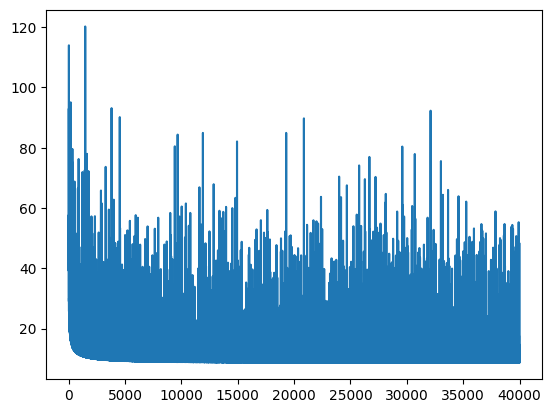

In [ ]:
modelSGD = LinearRegressionSGD(lr=0.1, max_iter=40000, batch_size=100, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(x_train, y_train, reg = "ElasticNet", lam = 2 * 1e-4, rho=0.2)
plt.plot(steps, errors)

In [ ]:
print('MSE')
print(modelSGD.MSE(x_train, y_train))
print(modelSGD.MSE(x_test, y_test))
print('MAE')
print(modelSGD.MAE(x_train, y_train))
print(modelSGD.MAE(x_test, y_test))
print('MAPE')
print(modelSGD.MAPE(x_train, y_train))
print(modelSGD.MAPE(x_test, y_test))

MSE
8.839784495555664
7.831643927967952
MAE
2.1061111384982882
2.0225659081173086
MAPE
0.10702470374208212
0.10735998902598871
